In [1]:
import pandas as pd

# 读取数据

In [28]:
data = pd.read_csv('../../数据/生成/预处理后数据.csv')
data.head()

C:\Users\76406\AppData\Local\Temp\ipykernel_24896\1965852082.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../数据/生成/预处理后数据.csv')


,serial_number,failure_time,collect_time,1_hwerr_f,1_hwerr_e,2_hwerr_c,2_sel,3_hwerr_n,2_hwerr_s,3_hwerr_m,...,3_cmci_sub,3_cmci_det,3_hwerr_pi,3_hwerr_o,3_hwerr_mce_l,manufacturer,vendor,tag,err_time,err
0,server_31576,2019-01-14 18:52:31,2019-01-14 18:19:01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,33.500000,1
1,server_31576,2019-01-14 18:52:31,2019-01-14 18:20:03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,32.466667,1
2,server_31576,2019-01-14 18:52:31,2019-01-14 18:25:51,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,26.666667,1
3,server_31576,2019-01-14 18:52:31,2019-01-14 18:29:57,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,22.566667,1
4,server_31576,2019-01-14 18:52:31,2019-01-14 18:32:08,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,20.383333,1


# 删除列

In [3]:
pred = data.drop(['err_time','failure_time','collect_time','serial_number','tag'],axis=1)

# 划分特征

In [4]:
x = pred.iloc[:,:-1]
y = pred.iloc[:,-1]

# 分类模型训练

In [5]:
from sklearn.model_selection import cross_validate

In [6]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,RandomForestClassifier

In [7]:
from xgboost import XGBClassifier,XGBRFClassifier
from lightgbm import LGBMClassifier

In [8]:
nick = 'xgbc,xgbrfc,lgbmc,adac,bgc,etc,gbc,hgbc,rfc'.split(',')
module = 'XGBClassifier,XGBRFClassifier,LGBMClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,RandomForestClassifier'.split(',')

In [9]:
# 召回率(正确预测出有风险的概率)
score_recall = []
for i,k in zip(nick,module):
    exec(f'{i} = {k}()')
    exec(f'score_recall.append(cross_validate({i},x,y,scoring = "recall" , cv = 5 , n_jobs=-1))')

In [10]:
# 准确率(总体正确概率)
score_accuracy = []
for i,k in zip(nick,module):
    exec(f'{i} = {k}()')
    exec(f'score_accuracy.append(cross_validate({i},x,y,scoring = "accuracy" , cv = 5 , n_jobs=-1))')

In [15]:
# 保存模型数据
import pickle
for i,k in zip(nick,module):
    exec(f'pickle.dump({i}, open("保存的模型/{k}.pkl", "wb"))')

In [16]:
# 读取模型数据
import joblib
for i,k in zip(nick,module):
    exec(f'{i} = joblib.load("保存的模型/{k}.pkl")')

### 排名

In [13]:
import numpy as np

In [16]:
# 主要看召回率
ind = np.argsort([j['test_score'].mean() for j in score_recall])[::-1]
print('排名 模型 (平均)召回率')
for i,k in enumerate(ind):
    print(i+1,module[k],'%f'%[j['test_score'].mean() for j in score_recall][k])

排名 模型 (平均)召回率
1 XGBClassifier 0.074325
2 RandomForestClassifier 0.074300
3 ExtraTreesClassifier 0.074292
4 BaggingClassifier 0.074160
5 LGBMClassifier 0.074011
6 HistGradientBoostingClassifier 0.073772
7 GradientBoostingClassifier 0.068233
8 XGBRFClassifier 0.063213
9 AdaBoostClassifier 0.004963


In [19]:
ind = np.argsort([j['test_score'].mean() for j in score_accuracy])[::-1]
print('排名 模型 (平均)准确率')
for i,k in enumerate(ind):
    print(i+1,module[k],'%f'%[j['test_score'].mean() for j in score_accuracy][k])

排名 模型 (平均)准确率
1 XGBRFClassifier 0.955396
2 GradientBoostingClassifier 0.952636
3 AdaBoostClassifier 0.951602
4 HistGradientBoostingClassifier 0.951381
5 LGBMClassifier 0.950298
6 BaggingClassifier 0.948035
7 RandomForestClassifier 0.948030
8 ExtraTreesClassifier 0.948028
9 XGBClassifier 0.948026


In [22]:
ind = np.argsort([(j['test_score'].mean()+k['test_score'].mean()).mean() for j,k in zip(score_accuracy,score_recall)])[::-1]
print('排名 模型 (综合)效果')
for i,k in enumerate(ind):
    print(i+1,module[k],'%f'%[(j['test_score'].mean()+k['test_score'].mean()).mean() for j,k in zip(score_accuracy,score_recall)][k])

排名 模型 (综合)效果
1 HistGradientBoostingClassifier 1.025154
2 LGBMClassifier 1.024310
3 XGBClassifier 1.022351
4 RandomForestClassifier 1.022330
5 ExtraTreesClassifier 1.022319
6 BaggingClassifier 1.022195
7 GradientBoostingClassifier 1.020869
8 XGBRFClassifier 1.018608
9 AdaBoostClassifier 0.956565


### 分类模型效果可视化

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
plt.rcParams['font.sans-serif']=['SimHei']

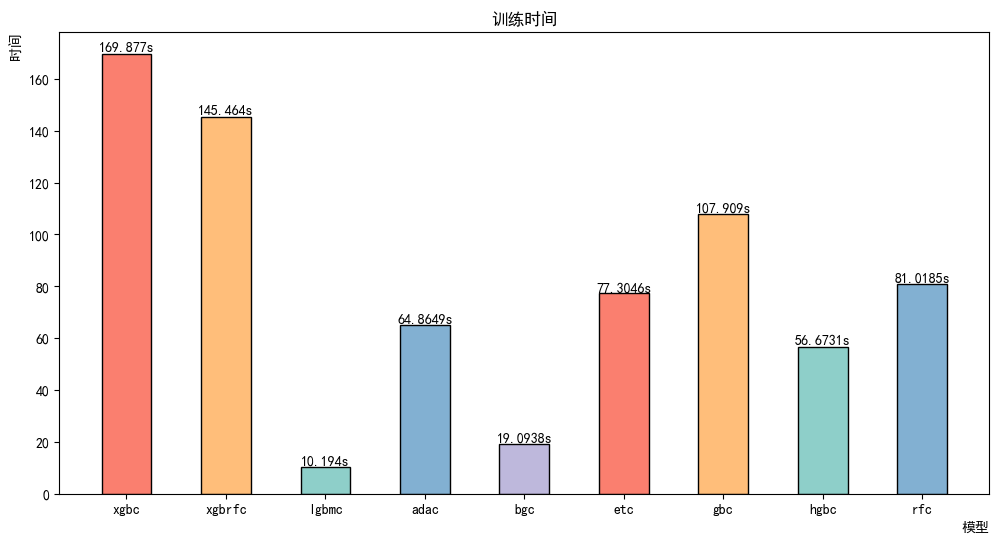

In [25]:
plt.figure(figsize=(12,6))
ax = plt.bar(nick,np.mean([i['fit_time'] for i in score_recall],axis=1),width=0.5,color={'#BEB8DC','#8ECFC9','#FFBE7A','#FA7F6F','#82B0D2'},linewidth=1,edgecolor='black')
plt.title('训练时间')
plt.ylabel('时间',loc='top')
plt.xlabel('模型',loc='right')
plt.bar_label(ax,fmt='%gs');

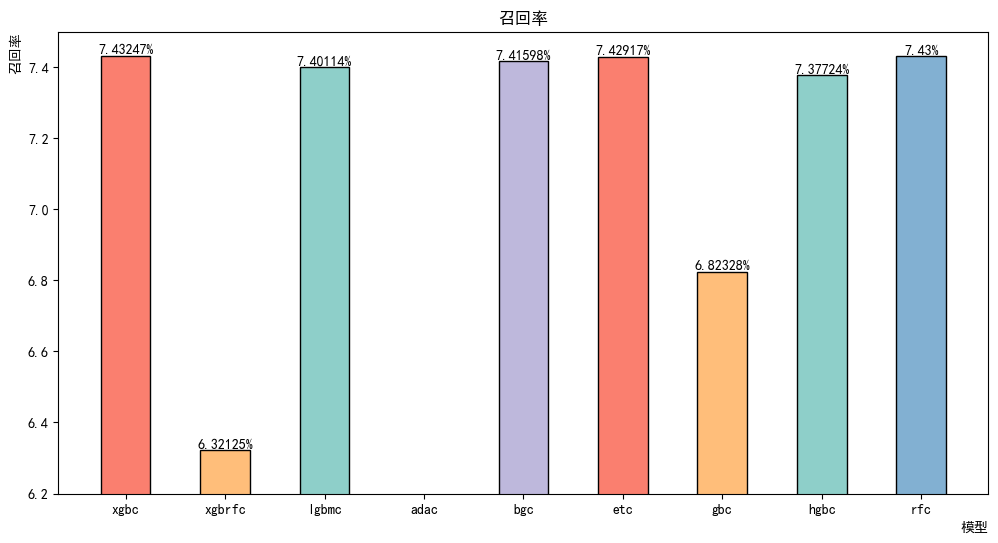

In [26]:
plt.figure(figsize=(12,6))
ax = plt.bar(nick,np.mean([i['test_score']*100 for i in score_recall],axis=1),color={'#BEB8DC','#8ECFC9','#FFBE7A','#FA7F6F','#82B0D2'},width=0.5,linewidth=1,edgecolor='black')
plt.title('召回率')
plt.ylabel('召回率',loc='top')
plt.xlabel('模型',loc='right')
plt.bar_label(ax,fmt='%2.6g%%')
plt.ylim(6.2,7.5);

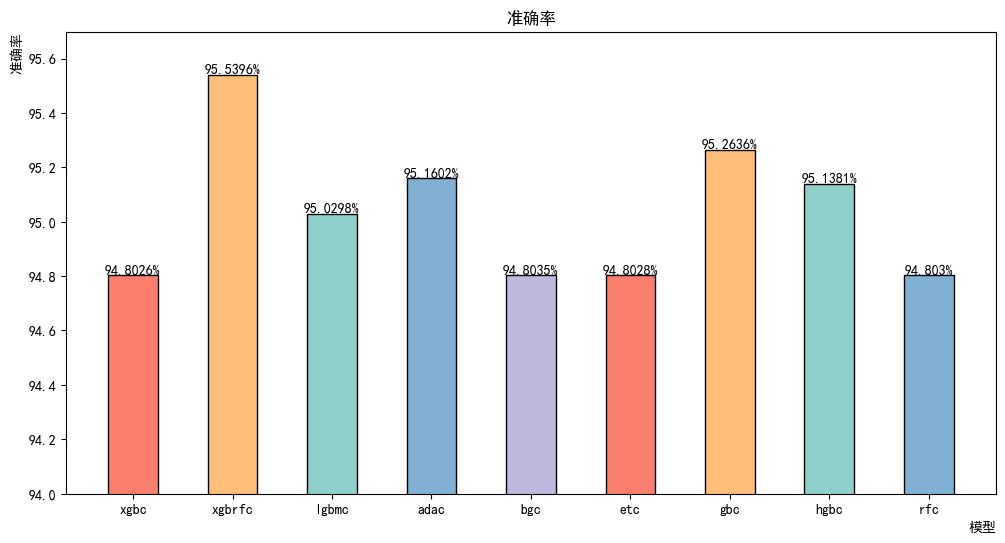

In [31]:
plt.figure(figsize=(12,6))
ax = plt.bar(nick,np.mean([i['test_score']*100 for i in score_accuracy],axis=1),color={'#BEB8DC','#8ECFC9','#FFBE7A','#FA7F6F','#82B0D2'},width=0.5,linewidth=1,edgecolor='black')
plt.title('准确率')
plt.ylabel('准确率',loc='top')
plt.xlabel('模型',loc='right')
plt.bar_label(ax,fmt='%2.6g%%')
plt.ylim(94,95.7);

# 调参
- 性能不够(时间过久)

In [246]:
from sklearn.model_selection import GridSearchCV

In [248]:
gcv = GridSearchCV(rfc,{'n_estimators':range(100,300)},scoring='recall',n_jobs=-1,cv=5)

In [ ]:
gcv.fit(x,y)

In [ ]:
gcv.cv_results

# 回归模型筛选

In [3]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

In [4]:
nicks = 'abr,gbr,rfr,dtr,svr,xgbr,xgbrfr,lgbmr'.split(',')
models = 'AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,DecisionTreeRegressor,SVR,XGBRegressor,XGBRFRegressor,LGBMRegressor'.split(',')

In [30]:
pred = data[data['err']==1]

In [31]:
pred = data.drop(['serial_number','failure_time','collect_time','err','tag'],axis=1)

In [32]:
pred.dropna(how='any',inplace=True)

In [33]:
x = pred.drop('err_time',axis=1)
y = pred['err_time']

# 训练

In [34]:
r2 = []
for n,m in zip(nicks,models):
    print(m)
    exec(f'''{n} = {m}()
r2.append(cross_val_score({n},x,y,scoring='r2',cv=5,n_jobs=-1))''')

AdaBoostRegressor
GradientBoostingRegressor
RandomForestRegressor
DecisionTreeRegressor
SVR
XGBRegressor
XGBRFRegressor
LGBMRegressor


# 结果

In [14]:
import numpy as np

In [35]:
ind = np.argsort([j.mean() for j in r2])[::-1]
print('排序 模型 r2得分')
for i,k in enumerate(ind):
    print(i+1,models[k],'%f'%[j.mean() for j in r2][k])

排序 模型 r2得分
1 GradientBoostingRegressor -0.029399
2 XGBRFRegressor -0.044230
3 RandomForestRegressor -0.056074
4 XGBRegressor -0.056461
5 DecisionTreeRegressor -0.056995
6 LGBMRegressor -0.057034
7 AdaBoostRegressor -0.081863
8 SVR -0.190989


# 可视化

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

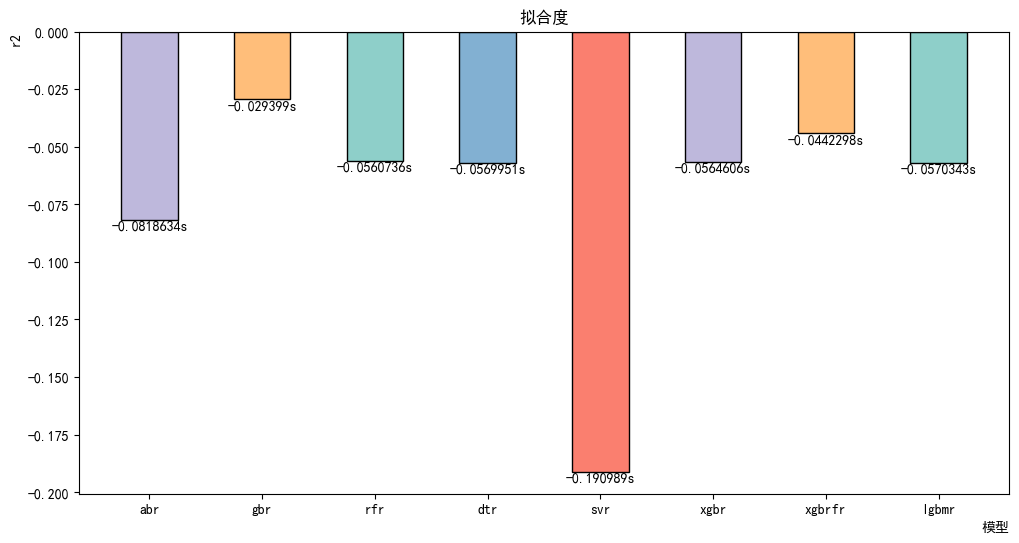

In [36]:
plt.figure(figsize=(12,6))
ax = plt.bar(nicks,np.mean([i for i in r2],axis=1),width=0.5,color={'#BEB8DC','#8ECFC9','#FFBE7A','#FA7F6F','#82B0D2'},linewidth=1,edgecolor='black')
plt.title('拟合度')
plt.ylabel('r2',loc='top')
plt.xlabel('模型',loc='right')
plt.bar_label(ax,fmt='%gs');